In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/Admission_Predict_V2.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,LOR
0,1,337.0,118.0,4,4.5,4.5,9.65,1,0.92,NaN
1,2,324.0,107.0,4,4.0,4.5,8.87,1,0.76,NaN
2,3,316.0,104.0,3,3.0,3.5,8.00,1,0.72,NaN
3,4,322.0,110.0,3,3.5,2.5,8.67,1,0.80,NaN
4,5,314.0,103.0,2,2.0,3.0,8.21,0,0.65,NaN


In [4]:
df.info()
#GRE : Signifie Graduate Record Examination
#TOEFL : Signifie Test of English as a Foreign Language
#SOP : Signifie Statement of Purpose
    #utilisé par les comités d’admission pour évaluer les objectifs académiques
#LOR : Signifie Letter of Recommendation
    #utilisée pour juger du sérieux, du potentiel et des qualités personnelles du candidat
#CGPA : Signifie Cumulative Grade Point Average
    #utilisé pour évaluer la performance académique globale
#Research : Signifie Expérience de recherche


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         550 non-null    int64  
 1   GRE Score          550 non-null    float64
 2   TOEFL Score        513 non-null    float64
 3   University Rating  550 non-null    int64  
 4   SOP                513 non-null    float64
 5   LOR                550 non-null    float64
 6   CGPA               550 non-null    float64
 7   Research           550 non-null    int64  
 8   Chance of Admit    550 non-null    float64
 9   LOR                0 non-null      float64
dtypes: float64(7), int64(3)
memory usage: 43.1 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,LOR
count,550.000000,550.000000,513.000000,550.000000,513.000000,550.000000,550.000000,550.000000,550.000000,0.0
mean,250.896364,316.335651,107.204041,3.125455,3.376218,3.484545,8.591772,0.572727,0.721655,NaN
std,146.927197,12.674963,6.434952,1.135889,0.995978,0.925375,0.616908,0.495133,0.142310,NaN
min,1.000000,277.754368,91.916154,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,NaN
25%,121.250000,308.000000,102.725335,2.000000,2.500000,3.000000,8.131200,0.000000,0.630000,NaN
50%,251.500000,316.000000,107.000000,3.000000,3.500000,3.500000,8.589128,1.000000,0.720000,NaN
75%,378.750000,325.000000,112.000000,4.000000,4.000000,4.000000,9.060000,1.000000,0.830000,NaN
max,500.000000,353.144823,125.588646,5.000000,5.000000,5.000000,10.240747,1.000000,0.970000,NaN


In [6]:
df_clean = df.drop(columns=[df.columns[9] , df.columns[0]])

In [7]:
df_clean.isna().sum()

GRE Score             0
TOEFL Score          37
University Rating     0
SOP                  37
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
df_clean = df_clean.dropna()

In [9]:
df_clean.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

## Analyse univariée avec matplotlib

<Axes: >

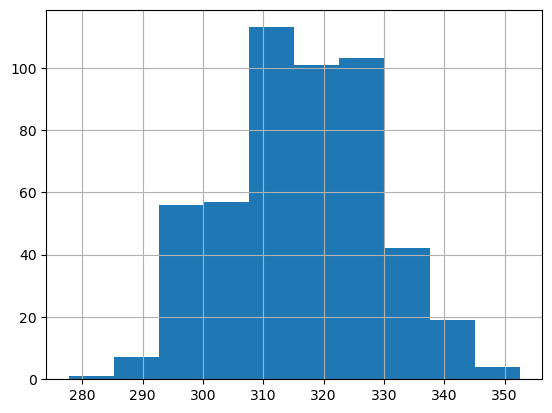

In [10]:
df_clean["GRE Score"].hist()

La valeur de GRE Score se concentre sur l'intervale de 300 à 335

<Axes: >

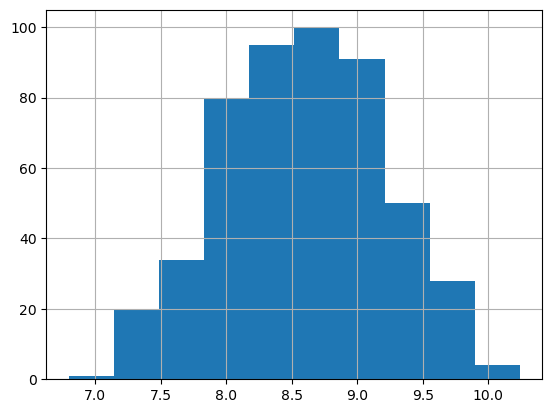

In [11]:
df_clean["CGPA"].hist()

On voit que la valeur du CGPA se concentre sur l'inntervalle de 8 à 9.5

<Axes: >

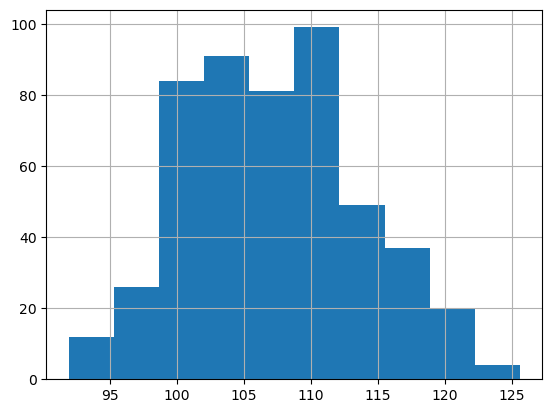

In [12]:
df_clean["TOEFL Score"].hist()

La valeur du TOEFL se concentre sur l'intervale de 100 à 120

<Axes: >

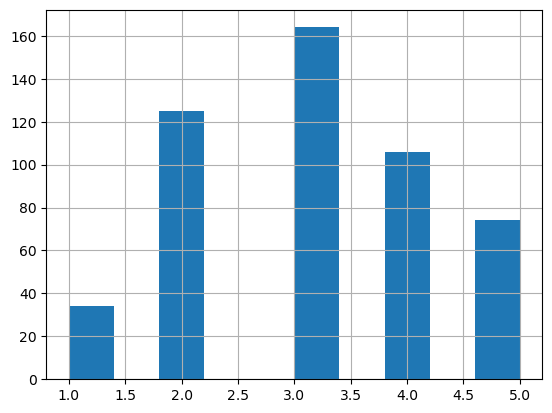

In [13]:
df_clean["University Rating"].hist()

la valeur se concentre sur l'intervale de 3 à 3.5

<Axes: >

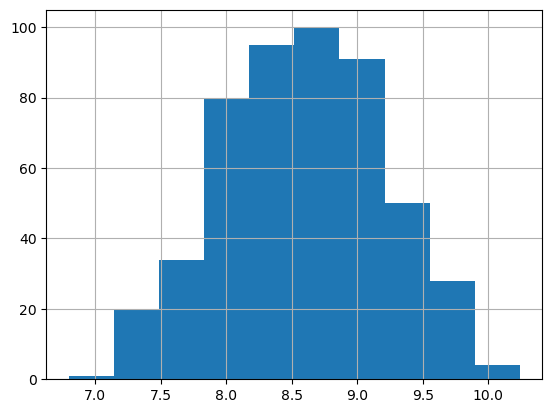

In [14]:
df_clean["CGPA"].hist()

<Axes: ylabel='count'>

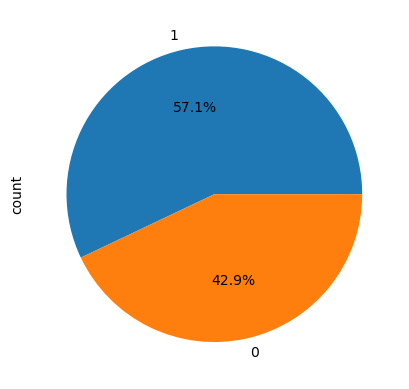

In [15]:
df_clean["Research"].value_counts().plot(kind='pie', autopct='%1.1f%%')

Les 57.3% des édutiants font de recherche et 42.7% non pas.

<Axes: >

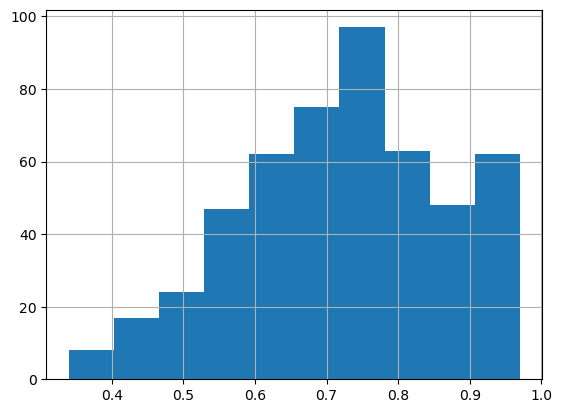

In [16]:
df_clean["Chance of Admit "].hist()

La valeur de chance of admit se concentre sur l'intervale de 0.6 à 0.8

## Analyse bivariée avec matplotlib

c:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

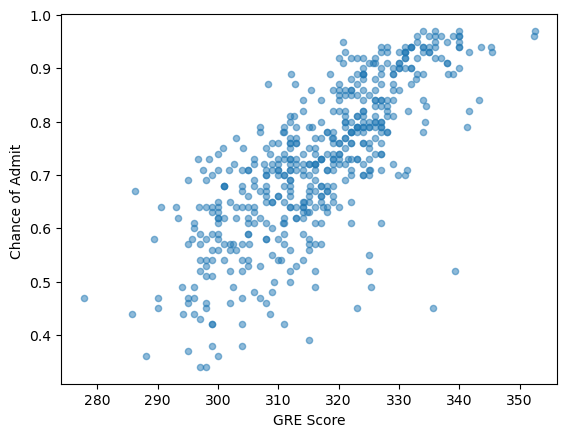

In [17]:
df_clean.plot.scatter(x='GRE Score', y='Chance of Admit ', colormap='viridis', alpha=0.5)

In [18]:
df_clean["GRE Score"].corr(df_clean["Chance of Admit "])

0.7537563179873027

On voit une relation positive. C'est dire plus le GRE Score augmente et plus la Chance of Admit est elevée.
Avec des correlations fortes

c:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

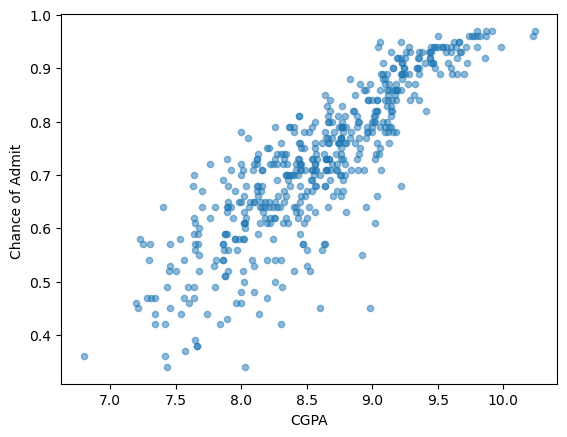

In [19]:
df_clean.plot.scatter(x='CGPA', y='Chance of Admit ', colormap='viridis', alpha=0.5)

In [20]:
df_clean["CGPA"].corr(df_clean["Chance of Admit "])

0.8619974947951256

On voit une relation positive. C'est dire plus le CGPA augmente et plus la Chance of Admit est elevée.
Avec des correlations fortes

c:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

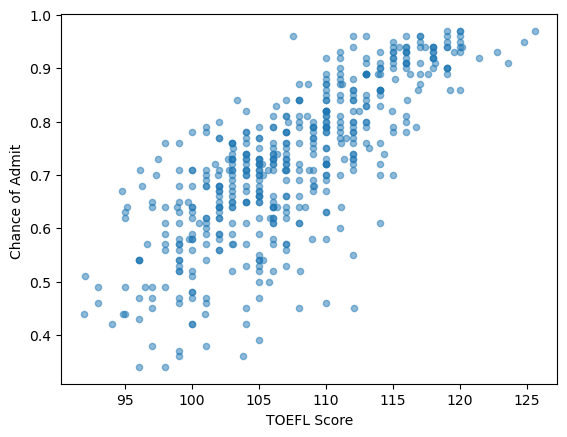

In [21]:
df_clean.plot.scatter(x='TOEFL Score', y='Chance of Admit ', colormap='viridis', alpha=0.5)

In [22]:
df_clean["TOEFL Score"].corr(df_clean["Chance of Admit "])

0.7764076111338996

On voit une relation positive. C'est dire plus le TOEFL Score augmente et plus la Chance of Admit est elevée.
Avec des correlations fortes

<Axes: title={'center': 'Chance of Admit '}, xlabel='Research'>

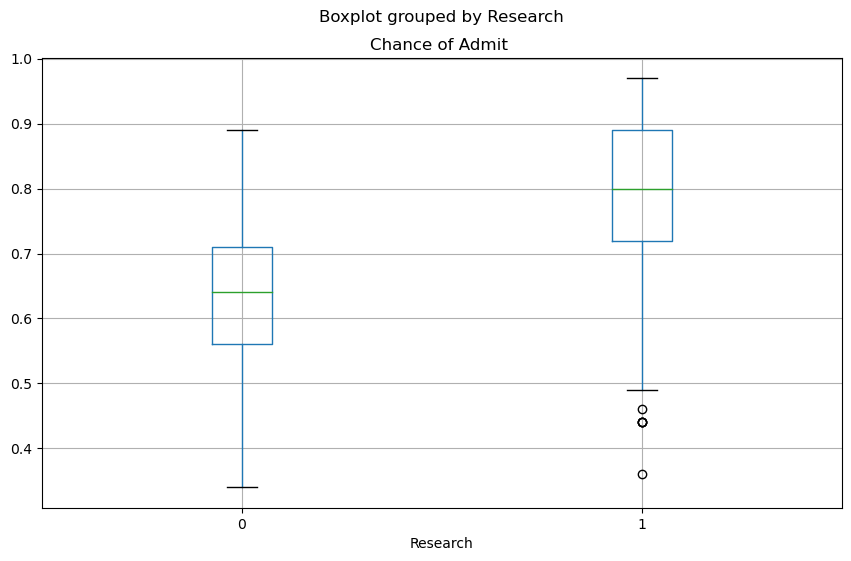

In [23]:
df_clean.boxplot(column='Chance of Admit ', by='Research', figsize=(10, 6))

In [24]:
df_clean["Research"].corr(df_clean["Chance of Admit "])

0.5454299003787331

On voit que ce qui ont fait de recherche a beaucoup de chance d'etre admit que ce qui n'ont pas fait.Avec des correlations assez elevé

In [25]:
data = df_clean
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4,4.0,4.5,8.87,1,0.76
2,316.0,104.0,3,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2,2.0,3.0,8.21,0,0.65


In [26]:
df_clean['Admitted'] = (df_clean['Chance of Admit '] >= 0.69).astype(int)

In [27]:
corr_matrix = df_clean.corr(numeric_only=True)
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
GRE Score,1.000000,0.751509,0.611207,0.591861,0.522259,0.762239,0.506428,0.753756,0.609998
TOEFL Score,0.751509,1.000000,0.648528,0.636343,0.542998,0.783509,0.440778,0.776408,0.609004
University Rating,0.611207,0.648528,1.000000,0.737628,0.623166,0.694516,0.426363,0.693715,0.553432
SOP,0.591861,0.636343,0.737628,1.000000,0.675466,0.714103,0.416346,0.690473,0.543975
LOR,0.522259,0.542998,0.623166,0.675466,1.000000,0.629481,0.387537,0.658282,0.527771
CGPA,0.762239,0.783509,0.694516,0.714103,0.629481,1.000000,0.481586,0.861997,0.680779
Research,0.506428,0.440778,0.426363,0.416346,0.387537,0.481586,1.000000,0.545430,0.454772
Chance of Admit,0.753756,0.776408,0.693715,0.690473,0.658282,0.861997,0.545430,1.000000,0.807034
Admitted,0.609998,0.609004,0.553432,0.543975,0.527771,0.680779,0.454772,0.807034,1.000000


<Axes: >

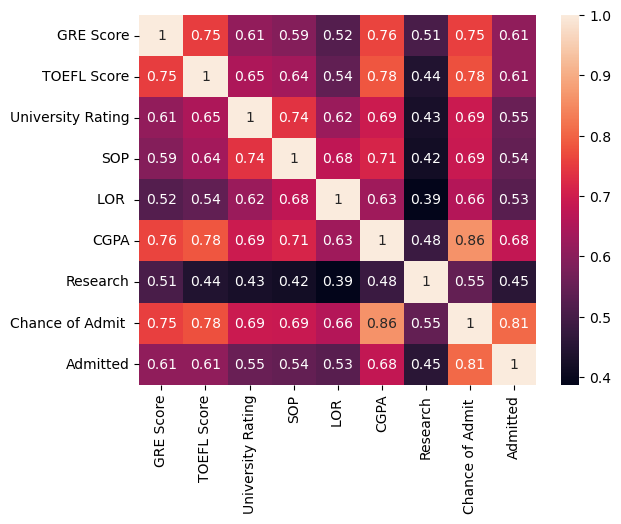

In [28]:
#Pour voir la correlation parmis tous les variables

sns.heatmap(corr_matrix , annot=True)

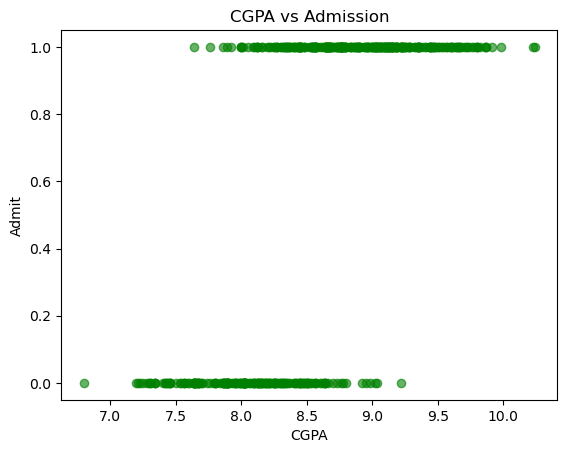

In [29]:
# Visualiser la corrélation entre la moyenne générale (CGPA) et la chance d’admission.
plt.scatter(df_clean['CGPA'], df_clean['Admitted'], alpha=0.6, color='green')
plt.title("CGPA vs Admission")
plt.xlabel("CGPA")
plt.ylabel("Admit")
plt.show()

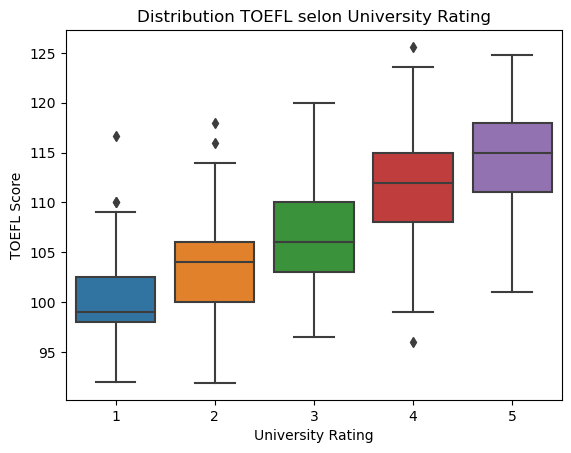

In [30]:

sns.boxplot(x='University Rating', y='TOEFL Score', data=df_clean)
plt.title("Distribution TOEFL selon University Rating")
plt.show()

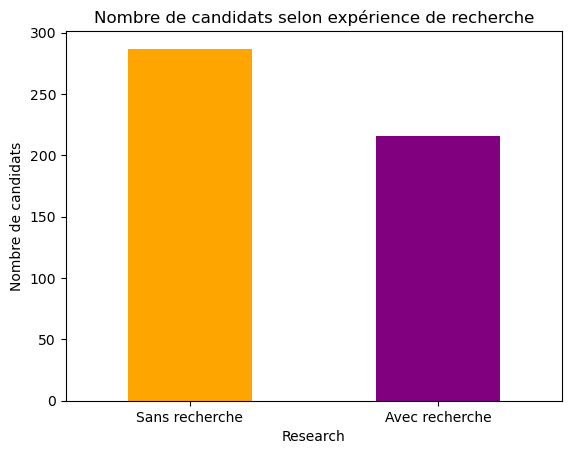

In [31]:
#Research correspond probablement si l'étudiant a une experience de recherche ou non
#1 : le candidat a participé à des projets de recherche ou a une expérience de recherche
#2 : le candidat n’a pas d’expérience de recherche
research_counts = df_clean['Research'].value_counts()

research_counts.plot(kind='bar', color=['orange', 'purple'])
plt.xticks([0,1], ['Sans recherche', 'Avec recherche'], rotation=0)
plt.title("Nombre de candidats selon expérience de recherche")
plt.ylabel("Nombre de candidats")
plt.show()

c:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


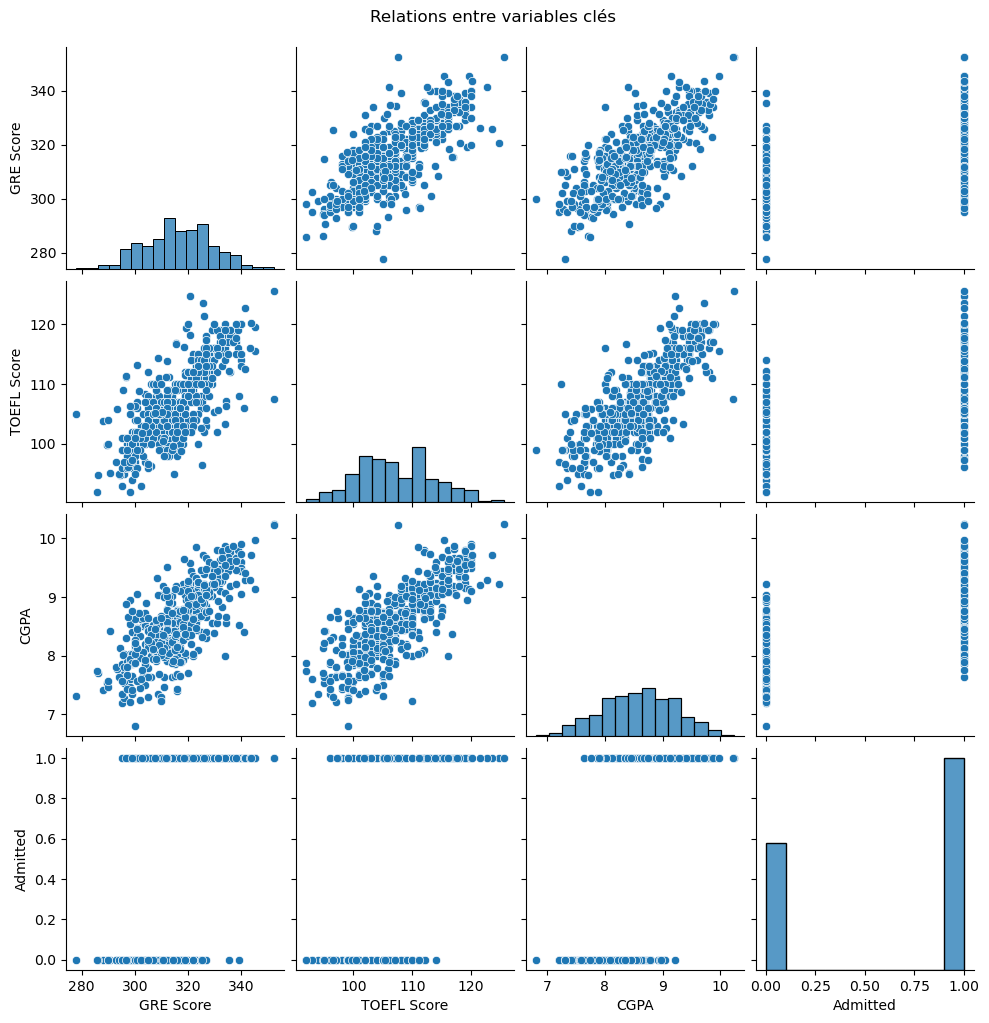

In [32]:
sns.pairplot(df_clean[['GRE Score', 'TOEFL Score', 'CGPA', 'Admitted']].dropna())
plt.suptitle("Relations entre variables clés", y=1.02)
plt.show()

In [33]:
#Les colonnes qu'on utilisera pour entrainer le modèle
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
X = df_clean[features]
y = df_clean['Admitted']

## Model de classification

In [34]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,learning_curve, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

In [35]:
# Séparation de l'entraînement et du test ici on utilise que 20% de notre donné
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
models = {
    'SVC': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

scores = {
    'SVC': [],
    'Decision Tree': [],
    'Random Forest': [],
    'Logistic Regression': [],
    'K-Nearest Neighbors': []
}

for name, model in models.items():
    # Pipeline avec scaler et modèle
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Entraînement
    pipeline.fit(X_train, y_train)
    
    # Prédiction
    y_pred = pipeline.predict(X_test)

    for metric in ['accuracy', 'precision', 'recall', 'f1-score']:
        if metric == 'accuracy':
            score = accuracy_score(y_test, y_pred)
        else:
            score = classification_report(y_test, y_pred, output_dict=True)['1'][metric]
        
        scores[name].append(score)
    
    # Évaluation
    print(f"Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("-" * 50)

Model: SVC
Confusion Matrix:
 [[30  4]
 [ 6 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.94      0.91      0.92        67

    accuracy                           0.90       101
   macro avg       0.89      0.90      0.89       101
weighted avg       0.90      0.90      0.90       101

Accuracy: 0.900990099009901
--------------------------------------------------
Model: Decision Tree
Confusion Matrix:
 [[22 12]
 [12 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65        34
           1       0.82      0.82      0.82        67

    accuracy                           0.76       101
   macro avg       0.73      0.73      0.73       101
weighted avg       0.76      0.76      0.76       101

Accuracy: 0.7623762376237624
--------------------------------------------------
Model: Random Forest
Confusion 

In [37]:
for k, v in scores.items():
    print(f"{k} Scores: {v}")

SVC Scores: [0.900990099009901, 0.9384615384615385, 0.9104477611940298, 0.9242424242424243]
Decision Tree Scores: [0.7623762376237624, 0.8208955223880597, 0.8208955223880597, 0.8208955223880597]
Random Forest Scores: [0.8712871287128713, 0.8857142857142857, 0.9253731343283582, 0.9051094890510949]
Logistic Regression Scores: [0.8712871287128713, 0.921875, 0.8805970149253731, 0.9007633587786259]
K-Nearest Neighbors Scores: [0.8910891089108911, 0.8888888888888888, 0.9552238805970149, 0.9208633093525178]


## Modéle SVC

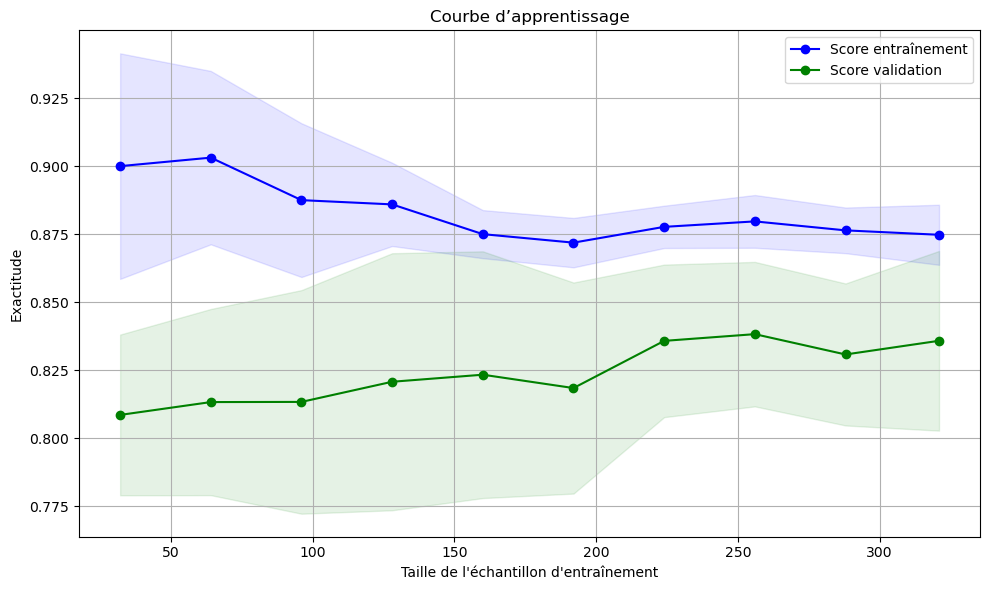

In [38]:
svc = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ])


train_sizes, train_scores, val_scores = learning_curve(
    svc,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score validation')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Courbe d’apprentissage')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Exactitude')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Presence d'overfitting

## Modéles avec random forest classifier

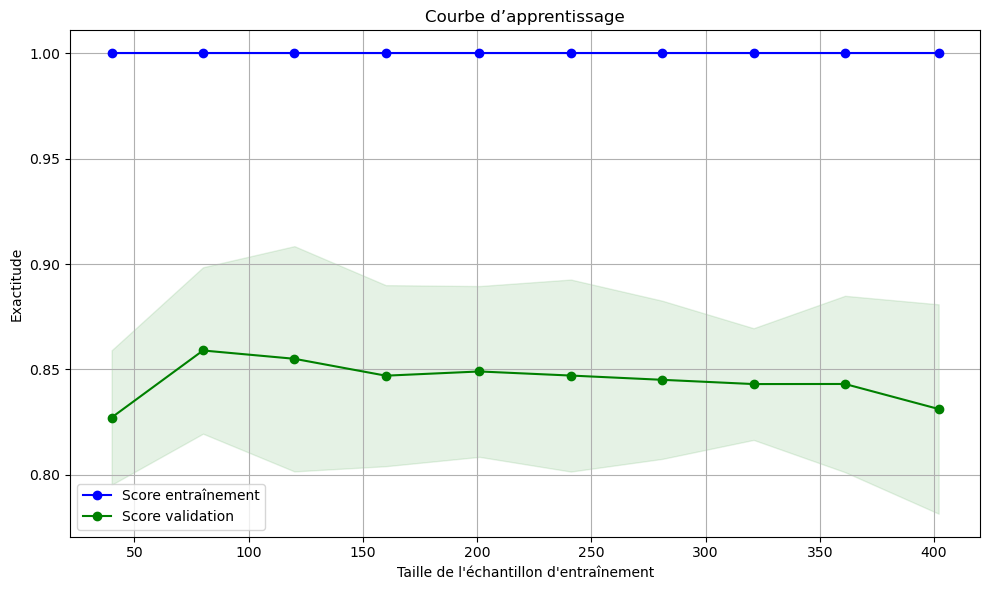

In [39]:
rfc = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ])


train_sizes, train_scores, val_scores = learning_curve(
    rfc,
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score validation')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Courbe d’apprentissage')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Exactitude')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Presence d'overfitting

# Modéles avec Decision Tree Classifier

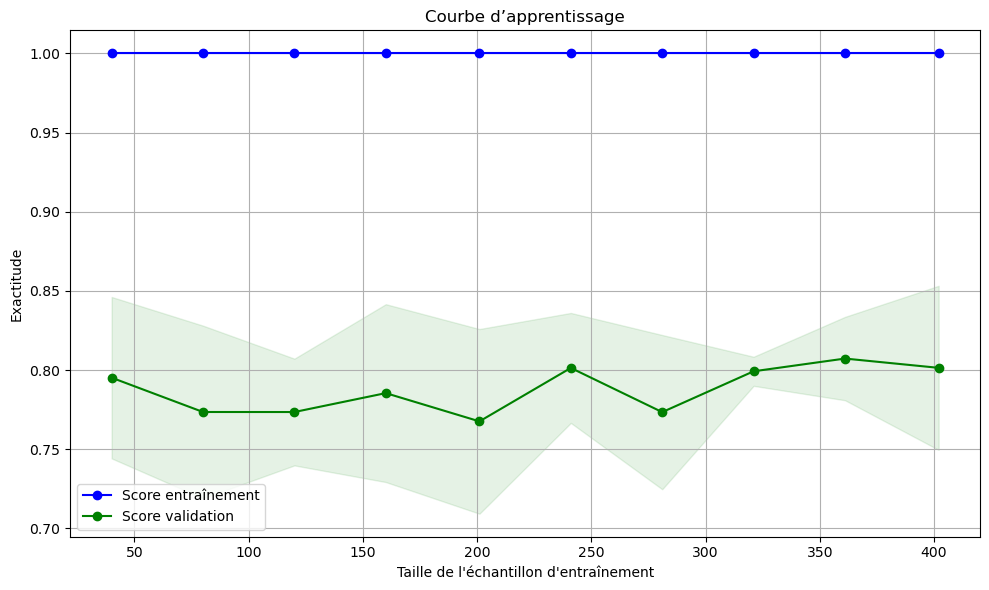

In [40]:
dtc = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])


train_sizes, train_scores, val_scores = learning_curve(
    dtc,
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score validation')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Courbe d’apprentissage')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Exactitude')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Presence d'overfitting

# Modéles avec LogisticRegression

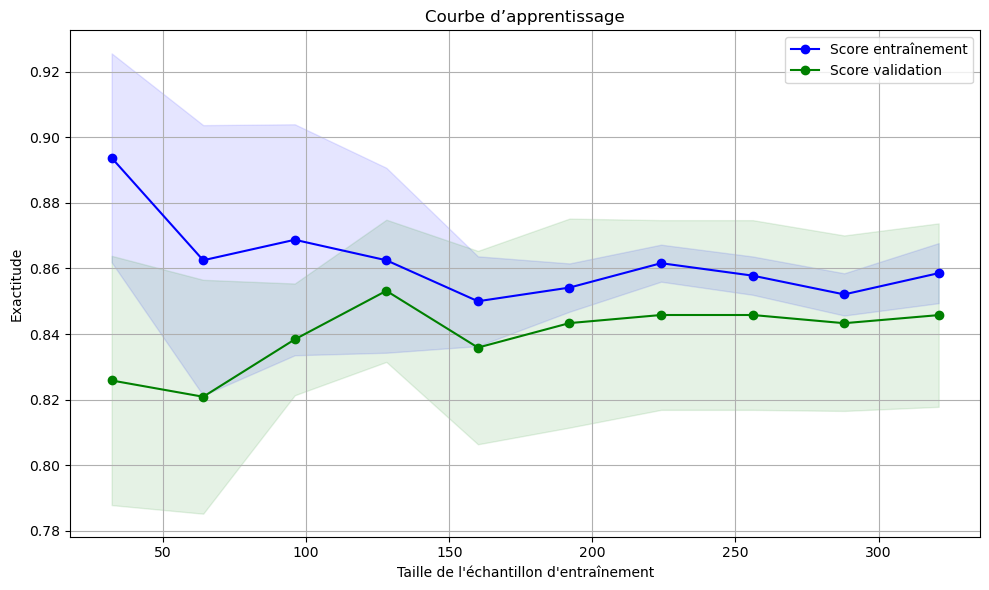

In [41]:
lr = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42, penalty='l2',max_iter=1000))
    ])


train_sizes, train_scores, val_scores = learning_curve(
    lr,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score validation')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Courbe d’apprentissage')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Exactitude')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Absence d'overfitting

# Modéles avec K-nearest neighbors

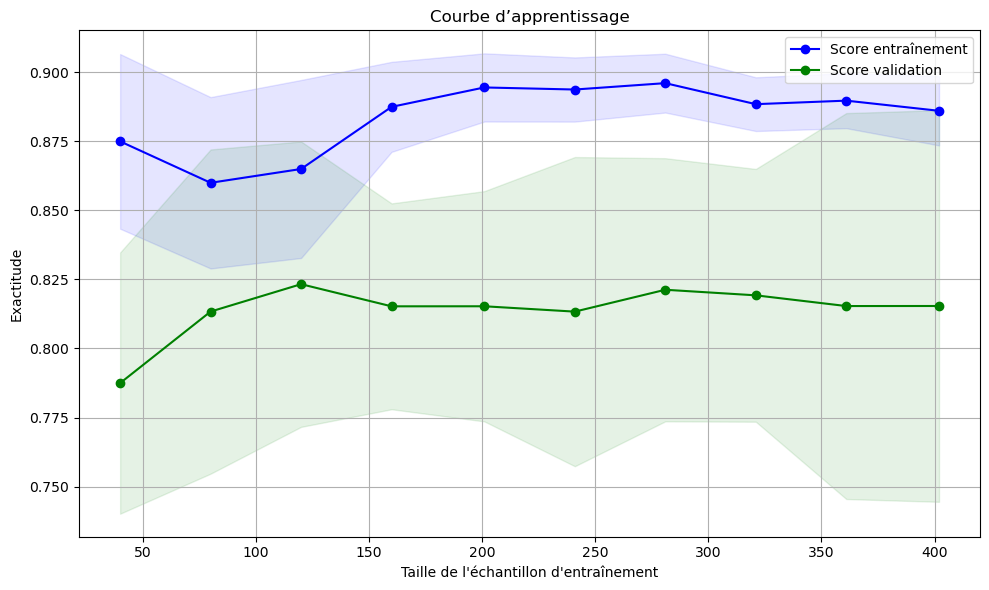

In [42]:
knn = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])


train_sizes, train_scores, val_scores = learning_curve(
    knn,
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy',
    shuffle=True,
    random_state=42
)


train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Score entraînement')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

plt.plot(train_sizes, val_mean, 'o-', color='green', label='Score validation')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

plt.title('Courbe d’apprentissage')
plt.xlabel('Taille de l\'échantillon d\'entraînement')
plt.ylabel('Exactitude')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Presence d'overfitting

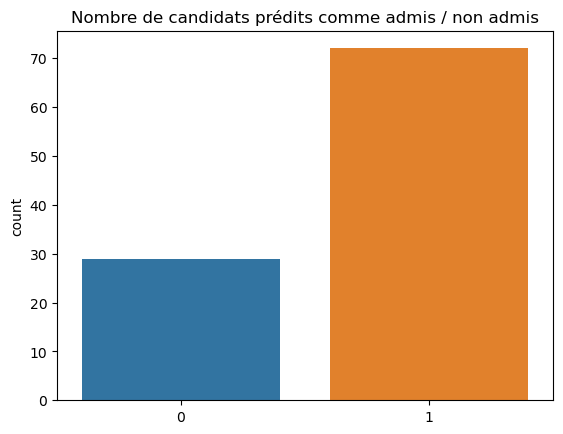

In [43]:
# Comparaison réelle vs prédite
sns.countplot(x=y_pred)
plt.title("Nombre de candidats prédits comme admis / non admis")
plt.show()



In [44]:
from sklearn.model_selection import GridSearchCV

In [56]:
params = {
    "penalty" : ['l1', 'l2', 'elasticnet'],
    "max_iter" : [100, 200, 300, 400, 500, 700, 800, 900]
}

grid = GridSearchCV(estimator= LogisticRegression(random_state=42),param_grid=params,scoring="accuracy", n_jobs=-1, cv=10)

In [57]:
grid.fit(X_train, y_train)

c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver =

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 400, 500, 700, 800, 900],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [61]:
grid.best_score_

0.8408536585365853

In [65]:
import pickle as pkl

with open('models/logistic.pkl', "wb") as log:
    pkl.dump(lr , log)

In [ ]:
def test_model_input(model):
    print("=== Prédiction d'admission à l'université ===")
    print("Tape 'aucun' si tu n'as jamais passé un test ou fourni un document.\n")

    # GRE Score
    while True:
        gre_input = input("GRE Score (260-340 ou 'aucun') : ").strip().lower()
        if gre_input == 'aucun':
            gre = 300  # valeur par défaut neutre
            print("GRE non fourni. Valeur par défaut utilisée : 300")
            break
        try:
            gre = float(gre_input)
            if 260 <= gre <= 340:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # TOEFL Score
    while True:
        toefl_input = input("TOEFL Score (0-120 ou 'aucun') : ").strip().lower()
        if toefl_input == 'aucun':
            toefl = 90  # valeur par défaut neutre
            print("TOEFL non fourni. Valeur par défaut utilisée : 90")
            break
        try:
            toefl = float(toefl_input)
            if 0 < toefl <= 120:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # University Rating
    while True:
        ur_input = input("Note de l'université (1 à 5 ou 'aucun') : ").strip().lower()
        if ur_input == 'aucun':
            ur = 3  # neutre
            print("Note d'université non fournie. Valeur par défaut utilisée : 3")
            break
        try:
            ur = int(ur_input)
            if 1 <= ur <= 5:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # SOP
    while True:
        sop_input = input("SOP (Lettre de motivation notée de 0.0 à 5.0 ou 'aucun') : ").strip().lower()
        if sop_input == 'aucun':
            sop = 3.0
            print("SOP non fourni. Valeur par défaut utilisée : 3.0")
            break
        try:
            sop = float(sop_input)
            if 0.0 <= sop <= 5.0:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # LOR
    while True:
        lor_input = input("LOR (Lettre de recommandation notée de 0.0 à 5.0 ou 'aucun') : ").strip().lower()
        if lor_input == 'aucun':
            lor = 3.0
            print("LOR non fournie. Valeur par défaut utilisée : 3.0")
            break
        try:
            lor = float(lor_input)
            if 0.0 <= lor <= 5.0:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # CGPA
    while True:
        cgpa_input = input("CGPA (Moyenne générale sur 10 ou 'aucun') : ").strip().lower()
        if cgpa_input == 'aucun':
            cgpa = 7.5
            print("CGPA non fourni. Valeur par défaut utilisée : 7.5")
            break
        try:
            cgpa = float(cgpa_input)
            if 0.0 <= cgpa <= 10.0:
                break
            else:
                print("Valeur hors plage.")
        except ValueError:
            print("Entrée invalide.")

    # Expérience de recherche
    while True:
        research_input = input("Expérience de recherche (oui / non) : ").strip().lower()
        if research_input in ['oui', 'non']:
            research = 1 if research_input == 'oui' else 0
            break
        print("Réponse invalide. Tape 'oui' ou 'non'.")

    # Assemblage des données
    new_data = pd.DataFrame([{
        'GRE Score': gre,
        'TOEFL Score': toefl,
        'University Rating': ur,
        'SOP': sop,
        'LOR ': lor,
        'CGPA': cgpa,
        'Research': research
    }])

    # Prédiction
    prediction = model.predict(new_data)[0]

    print("\nRésultat de la prédiction :")
    if prediction == 1:
        print("=> Candidat probablement admis.")
    else:
        print("=> Candidat probablement non admis.")

# Exemple d'exécution
import joblib
model_loaded = joblib.load('data/final_model')
test_model_input(model_loaded)


=== Prédiction d'admission à l'université ===
Tape 'aucun' si tu n'as jamais passé un test ou fourni un document.

GRE non fourni. Valeur par défaut utilisée : 300
SOP non fourni. Valeur par défaut utilisée : 3.0
LOR non fournie. Valeur par défaut utilisée : 3.0

Résultat de la prédiction :
=> Candidat probablement admis.


## Model lineaire

Preprocessing data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data.drop('Chance of Admit ', axis=1)
y = data['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

In [ ]:
mean_squared_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mean_squared_error)
print("R^2 Score:", r2)

Mean Squared Error: 0.004212486569428794
R^2 Score: 0.7703054633184104
